In [2]:
import time
import os
import sys
import logging

import numpy as np
import tenseal as ts

from sklearn.model_selection import train_test_split
os.chdir("/home/apignet/homomorphic-encryption/ckks_titanic")
from src.features import build_features
from models import encrypted_LR
from models import unencrypted_LR

In [3]:
%load_ext memory_profiler

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
1

1

# definition of parameters

### Paths

In [5]:
#DATA_PATH = "\\data\\raw\\"            # whole data set
DATA_PATH = "/data/quick_demo/"   # subset of the data set, with 15 train_samples and 5 test_samples
#DATA_PATH = "/home/apignet/homomorphic-encryption/ckks_titanic/data/quick_demo/"   # subset of the data set, with 400 train_samples and 50 test_samples
LOG_PATH = "reports/log"
LOG_FILENAME = "test_0716"

In [6]:
os.getcwd()

'/home/apignet/homomorphic-encryption/ckks_titanic'

### Log 

In [7]:
fileHandler = logging.FileHandler("{0}/{1}.log".format(LOG_PATH, LOG_FILENAME))
streamHandler = logging.StreamHandler(sys.stdout)
logging.basicConfig(format="%(asctime)s  [%(levelname)-8.8s]  %(message)s", datefmt='%m/%d/%Y %I:%M:%S %p', level = logging.DEBUG, handlers=[fileHandler, streamHandler])

### Training variables

In [8]:
EPOCH = 20
LEARNING_RATE = 0.8
MOMENTUM_RATE = 0.5
REGULARIZATION_RATE = 0.5
VERBOSE = 2
SAVE_WEIGHT = 2
N_JOBS = 1

# Loading and processing the data

In [9]:
%%memit
logging.info(os.getcwd())
raw_train, raw_test = build_features.data_import(os.getcwd()+DATA_PATH)
train, submission_test = build_features.processing(raw_train, raw_test)
del submission_test

07/23/2020 02:04:31 PM  [INFO    ]  /home/apignet/homomorphic-encryption/ckks_titanic
07/23/2020 02:04:31 PM  [INFO    ]  loading the data into memory (pandas df)
07/23/2020 02:04:31 PM  [INFO    ]  Done
07/23/2020 02:04:31 PM  [INFO    ]  making final data set from raw data
07/23/2020 02:04:31 PM  [INFO    ]  Done
07/23/2020 02:04:31 PM  [INFO    ]  /home/apignet/homomorphic-encryption/ckks_titanic
07/23/2020 02:04:31 PM  [INFO    ]  loading the data into memory (pandas df)
07/23/2020 02:04:31 PM  [INFO    ]  Done
07/23/2020 02:04:31 PM  [INFO    ]  making final data set from raw data
07/23/2020 02:04:31 PM  [INFO    ]  Done
peak memory: 158.98 MiB, increment: 14.23 MiB


In [10]:
%%memit
train, test = train_test_split(train, test_size=0.15)
train_labels = train.Survived
test_labels = test.Survived
train_features = train.drop("Survived", axis=1)
test_features = test.drop("Survived", axis=1)

peak memory: 159.28 MiB, increment: 0.05 MiB


# Definition of safety parameters

# Data encryption

# Initialize the weight

The weights have to be crypted 

In [11]:
%%memit
unencrypted_weight = np.random.normal(loc=0,
                                      scale=0.2, size =(train_features.to_numpy().shape[1]))
logging.info(unencrypted_weight)
unencrypted_bias = np.random.random((1))


07/23/2020 02:04:33 PM  [INFO    ]  [-1.98867069e-04 -1.88269381e-01  1.40207351e-01 -1.93837725e-02
  8.65651988e-02 -3.58874468e-01  3.14610433e-01  1.19775921e-01
  4.31222638e-01 -2.70657353e-01  5.83030665e-02  1.68981213e-01
 -6.36685123e-02 -1.29243075e-01 -2.22587478e-01 -4.19143070e-02
 -6.03253862e-03  3.74188322e-01  4.92835541e-02  1.22966780e-01
 -1.67837976e-01 -1.65516435e-01 -5.69377052e-02  2.33648142e-01
  2.11596858e-01  1.51481886e-01 -3.09974103e-02 -2.77493797e-02
 -2.04113457e-01  1.44188834e-01 -2.44008318e-02]
07/23/2020 02:04:33 PM  [INFO    ]  [ 0.16585189 -0.07804421  0.04073539  0.3414023   0.12323479 -0.10794063
 -0.13318004  0.15551654 -0.52120696  0.15321134  0.17631414  0.06378324
  0.0771158   0.29794473 -0.2124033   0.12282094 -0.28256641  0.21359345
  0.44973159 -0.08619254  0.03181913  0.28257267 -0.01782413 -0.13019651
 -0.11819255  0.21182448 -0.16666351 -0.00463259 -0.31301834  0.06745979
  0.17102493]
07/23/2020 02:04:33 PM  [INFO    ]  [-0.1032

The confidential data as yet stored into a dictionnary, and will be used during the training only by functions which are passed as arguments to the fit methods. This encapsulation of sensitive data will allows us to ensure security during training later. 

# Training the unencrypted model

In [12]:
logging.info("Model initialization")
unencrypted_model = unencrypted_LR.LogisticRegression(init_weight=unencrypted_weight,
                                                      init_bias=unencrypted_bias,
                                                      verbose=VERBOSE,
                                                      save_weight= SAVE_WEIGHT,
                                                      max_epoch=EPOCH,
                                                      learning_rate=LEARNING_RATE,
                                                      momentum_rate=0,
                                                      reg_para=REGULARIZATION_RATE,
                                                      n_jobs = N_JOBS)

07/23/2020 02:04:35 PM  [INFO    ]  Model initialization


In [13]:
logging.info("Training starting")
timer=time.time()
unencrypted_model.fit(train_features.to_numpy(), train_labels.to_numpy().reshape((-1, 1)))
logging.info("Training done. " + str(round(time.time() - timer, 0)) + " seconds")

07/23/2020 02:04:37 PM  [INFO    ]  Training starting
07/23/2020 02:04:37 PM  [INFO    ]  Just finished iteration number 1 
07/23/2020 02:04:37 PM  [INFO    ]  Loss : 1.0060968300487356.
07/23/2020 02:04:37 PM  [INFO    ]  Just finished iteration number 3 
07/23/2020 02:04:37 PM  [INFO    ]  Loss : 0.4569661894409352.
07/23/2020 02:04:37 PM  [INFO    ]  Just finished iteration number 5 
07/23/2020 02:04:37 PM  [INFO    ]  Loss : 0.3935017767585469.
07/23/2020 02:04:37 PM  [INFO    ]  Just finished iteration number 7 
07/23/2020 02:04:37 PM  [INFO    ]  Loss : 0.35448613343479973.
07/23/2020 02:04:37 PM  [INFO    ]  Just finished iteration number 9 
07/23/2020 02:04:37 PM  [INFO    ]  Loss : 0.32872119017635276.
07/23/2020 02:04:37 PM  [INFO    ]  Just finished iteration number 11 
07/23/2020 02:04:37 PM  [INFO    ]  Loss : 0.3122796767857525.
07/23/2020 02:04:37 PM  [INFO    ]  Just finished iteration number 13 
07/23/2020 02:04:37 PM  [INFO    ]  Loss : 0.30193141835918996.
07/23/2020

In [ ]:
acc = unencrypted_model.accuracy(test_features.to_numpy(), test_labels.to_numpy().reshape((-1, 1)))
logging.info("Accuracy of unencrypted model : %s " % acc)

In [44]:
logging.info("Model initialization")
unencrypted_model_wm = unencrypted_LR.LogisticRegression(init_weight=unencrypted_weight,
                                                      init_bias=unencrypted_bias,
                                                      verbose=VERBOSE,
                                                      save_weight= SAVE_WEIGHT,
                                                      max_epoch=EPOCH,
                                                      learning_rate=LEARNING_RATE+0.1,
                                                      momentum_rate=0.2,
                                                      reg_para=REGULARIZATION_RATE,
                                                      n_jobs = N_JOBS)

07/23/2020 02:09:36 PM  [INFO    ]  Model initialization


In [45]:
logging.info("Training starting")
timer=time.time()
unencrypted_model_wm.fit(train_features.to_numpy(), train_labels.to_numpy().reshape((-1, 1)))
logging.info("Training done. " + str(round(time.time() - timer, 0)) + " seconds")

07/23/2020 02:09:36 PM  [INFO    ]  Training starting
07/23/2020 02:09:36 PM  [INFO    ]  Just finished iteration number 1 
07/23/2020 02:09:36 PM  [INFO    ]  Loss : 1.008405696849794.
07/23/2020 02:09:36 PM  [INFO    ]  Just finished iteration number 3 
07/23/2020 02:09:36 PM  [INFO    ]  Loss : 0.393648582570402.
07/23/2020 02:09:36 PM  [INFO    ]  Just finished iteration number 5 
07/23/2020 02:09:36 PM  [INFO    ]  Loss : 0.33839942199646916.
07/23/2020 02:09:36 PM  [INFO    ]  Just finished iteration number 7 
07/23/2020 02:09:36 PM  [INFO    ]  Loss : 0.31826370707275353.
07/23/2020 02:09:36 PM  [INFO    ]  Just finished iteration number 9 
07/23/2020 02:09:36 PM  [INFO    ]  Loss : 0.30154484500417356.
07/23/2020 02:09:36 PM  [INFO    ]  Just finished iteration number 11 
07/23/2020 02:09:36 PM  [INFO    ]  Loss : 0.292996608369274.
07/23/2020 02:09:36 PM  [INFO    ]  Just finished iteration number 13 
07/23/2020 02:09:36 PM  [INFO    ]  Loss : 0.2887470906986167.
07/23/2020 02

# Figures

## encrypted and unencrypted losses 

07/23/2020 02:09:37 PM  [DEBUG   ]  update_title_pos
07/23/2020 02:09:37 PM  [DEBUG   ]  update_title_pos
07/23/2020 02:09:37 PM  [DEBUG   ]  update_title_pos
07/23/2020 02:09:37 PM  [DEBUG   ]  update_title_pos
07/23/2020 02:09:37 PM  [DEBUG   ]  update_title_pos


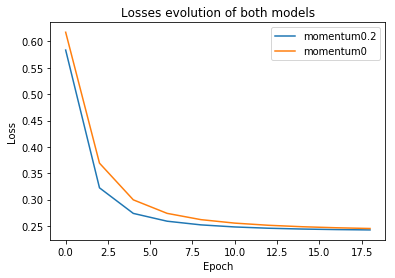

In [46]:
plt.plot([i*VERBOSE for i in range(len(unencrypted_model_wm.true_loss_list))], unencrypted_model_wm.true_loss_list, label='momentum'+str(unencrypted_model_wm.mr))
plt.plot([i*VERBOSE for i in range(len(unencrypted_model.true_loss_list))], unencrypted_model.true_loss_list,label='momentum'+str(unencrypted_model.mr))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Losses evolution of both models')
plt.legend(loc='best')

## Unencrypted loss

# Errors

## Relative error between losses

In [ ]:
decrypted = [i.decrypt(secret_key)[0] for i in model.loss_list]
true_err_cl = np.abs(np.array(decrypted) - np.array(unencrypted_model.loss_list))
rel_err_cl = true_err_cl/np.abs(decrypted)
true_err_ct = np.abs(np.array(decrypted) - np.array(unencrypted_model.true_loss_list))
rel_err_ct = true_err_ct/np.abs(decrypted)
true_err_lt = np.abs(np.array(unencrypted_model.loss_list) - np.array(unencrypted_model.true_loss_list))
rel_err_lt = true_err_lt/np.abs(unencrypted_model.true_loss_list)


In [ ]:
plt.plot([i*VERBOSE for i in range(len(model.loss_list))],  rel_err_cl, label='cipherloss and plainloss')
plt.plot([i*VERBOSE for i in range(len(model.loss_list))],  rel_err_ct, label='cipherloss and trueloss' )
plt.plot([i*VERBOSE for i in range(len(model.loss_list))],  rel_err_lt, label='plainlosses')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Relative error on loss')
plt.title('Relative error between losses')

## Relative error between weights

In [ ]:
dwl = np.array([i.decrypt(secret_key) for i in model.weight_list])
dbl = np.array([i.decrypt(secret_key) for i in model.bias_list]).reshape((-1,1))
dl = np.concatenate((dwl,dbl), axis=1)

ul = np.concatenate((np.array(unencrypted_model.weight_list), np.array(unencrypted_model.bias_list).reshape((-1,1))), axis=1)
w_err = np.mean((np.abs(dl-ul)/np.abs(ul)), axis=1)

In [ ]:
plt.plot([i*VERBOSE for i in range(w_err.shape[0])],w_err)
plt.xlabel('Epoch')
plt.ylabel('Relative error on weights')
plt.title('Relative error between encrypted weights and unencrypted weights')

# Error of the log approx, crypted and decrypted

In [ ]:
uX=np.linspace(0.01, 1, 10).reshape((-1,1))
eX = crytp_array(uX, local_context=context)

In [ ]:
def log(x):
    poly_coeff = [-3.57257812,  8.78497194, -6.88562064,  1.81888491]
    return x.polyval([i  for i in poly_coeff])

In [ ]:
el = [log(x) for x in eX]

In [ ]:
dX = [i.decrypt(secret_key) for i in el]

In [ ]:
dX

In [ ]:
np.log(uX)

In [ ]:
np.abs(dX - np.log(uX))/uX